In [ ]:
# To Import the basic Libraries
import numpy as np
import pandas as pd
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For jupyter notebook widgets
#import ipywidgets as widgets
#from ipywidgets import interact
#from ipywidgets import interact_manual
# for Interactive Shells
from IPython.display import display
# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

In [2]:
# To read the dataset
data = pd.read_csv("C:/Users/vinee/Dropbox/PC/Downloads/archive/movie_metadata.csv")

In [3]:
# To check the shape
print(data.shape)

(5043, 28)


In [4]:
# To check the column wise info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
#Missing Values Imputation
round(100*(data.isnull().sum()/len(data.index)), 2)

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

In [6]:
#Since ‘gross’ and ‘budget’ columns have a large number of NaN values, drop all the rows with NaNs at this column using the
#‘isnan’ function of NumPy along with a negation ‘~’
data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

In [7]:
#To again check the Missing Values column-wise.
data.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 75
movie_facebook_likes          0
dtype: int64

In [8]:
#The rows for which the sum of Null is less than two are retained.
data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        4
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  4
facenumber_in_poster          6
plot_keywords                24
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               41
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 67
movie_facebook_likes          0
dtype: int64

In [9]:
#Now We cannot use statistical values for imputing the missing values of actor names, so we will replace the 
#actor names with “Unknown”.
data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

In [10]:
#Here we imputed all the missing value, so to check the no. of total missing values in the dataset.
data.isnull().sum().sum()

148

In [11]:
#Now finally we have zero null values.

In [15]:
#Feature Engineering:
#Now to convert the gross and budget from $ to Million $ to make our analysis easier.
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000
print(data)

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
5     Color     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
5033  Color      Shane Carruth                   143.0      77.0   
5034  Color   Neill Dela Llana                    35.0      80.0   
5035  Color   Robert Rodriguez                    56.0      81.0   
5037  Color       Edward Burns                    14.0      95.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0

In [ ]:
"""alculating Profit of a Movie:
#Budget: It is an amount that Producers Spend to Produce a Movie that 
Includes the Production, casting, and Advertisements cost.

#Gross: It is an amount that Producers earn by releasing their movies in theaters, 
selling satellite rights to TV, OTT Platforms such as Prime, Hulu, Disney+Hotstar, Netflix, etc.
"""

In [16]:
#Profit: Gross — Budget,
#We are going to use this formula, to calculate the Top Most Profitable Movies of all time.
#To create a Profit column using the Budget and Gross.
data['Profit'] = data['gross'] - data['budget']
print(data)

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
5     Color     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
5033  Color      Shane Carruth                   143.0      77.0   
5034  Color   Neill Dela Llana                    35.0      80.0   
5035  Color   Robert Rodriguez                    56.0      81.0   
5037  Color       Edward Burns                    14.0      95.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0

In [17]:
#Now to check the name of the Top 10 Profitable Movies.
data[['Profit','movie_title']].sort_values(by = 'Profit', ascending  = False).head(10)

,Profit,movie_title
0,0.000524,Avatar
29,0.000502,Jurassic World
26,0.000459,Titanic
3024,0.000450,Star Wars: Episode IV - A New Hope
3080,0.000424,E.T. the Extra-Terrestrial
794,0.000403,The Avengers
17,0.000403,The Avengers
509,0.000378,The Lion King
240,0.000360,Star Wars: Episode I - The Phantom Menace
66,0.000348,The Dark Knight


In [ ]:
"""By looking at the above result we can easily analyze that there is some duplicate. 
So we have to remove these duplicates.
lets print the no. of rows before removing Duplicates
"""

In [19]:
print("No. of Rows Before Removing Duplicates: ",data.shape[0])

No. of Rows Before Removing Duplicates:  3879


In [22]:
# So to remove all the duplicates from the data
data.drop_duplicates(subset = None, keep = 'first', inplace = True)
# To print the no. of rows after removing Duplicates
print("No. of Rows After Removing Duplicates: ",data.shape[0])

No. of Rows After Removing Duplicates:  3845


In [23]:
#Top 10 Movies with Highest profit:

In [24]:
#To check the Top 10 Profitable Movies Again.
data[['movie_title','Profit']].sort_values(by = 'Profit', ascending  = False).head(10)

,movie_title,Profit
0,Avatar,0.000524
29,Jurassic World,0.000502
26,Titanic,0.000459
3024,Star Wars: Episode IV - A New Hope,0.000450
3080,E.T. the Extra-Terrestrial,0.000424
17,The Avengers,0.000403
509,The Lion King,0.000378
240,Star Wars: Episode I - The Phantom Menace,0.000360
66,The Dark Knight,0.000348
439,The Hunger Games,0.000330


In [25]:
#Manipulating the Duration and Language Column:

In [26]:
#To check the values in the language column.
data['language'].value_counts()

English       3664
French          37
Spanish         25
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Hebrew           2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [28]:
#Looking at the above output we can easily observe that out of 3,500 movies only 150 movies are of other languages. 
#So it is better to keep only two languages that are English and Foreign.
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'
# lets apply the function on the language column
data['language'] = data['language'].apply(language)
# lets check the values again
data['language'].value_counts()

English    3664
Foreign     181
Name: language, dtype: int64

In [29]:
"""The Duration of Movies is not varying a lot but we know that most of the users either like watching long movies or 
short-duration movies. We can categorize the movies in two-part i.e., short and long. 
So define a function for categorizing the Duration of Movies.
"""
def duration(x):
     if x <= 120:
        return 'Short'
     else:
        return 'Long'
# Now to apply this function on the duration column
data['duration'] = data['duration'].apply(duration)
# lets check the values of Duration column
data['duration'].value_counts()

Short    2928
Long      917
Name: duration, dtype: int64

In [30]:
#Now to check the values in the Genres Column.
data['genres'].value_counts()

Drama                                      153
Comedy|Drama|Romance                       151
Comedy|Drama                               146
Comedy                                     145
Comedy|Romance                             136
                                          ... 
Adventure|Comedy|Sci-Fi|Western              1
Action|Biography|Drama|Thriller|War          1
Action|Fantasy|Western                       1
Action|Adventure|Family|Fantasy|Romance      1
Comedy|Crime|Horror                          1
Name: genres, Length: 760, dtype: int64

In [31]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [32]:
#We can see from the above output that most of the movies are having a lot of genres also, a movie can have so many 
#genres so let's keep four genres.
data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])
# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])
#Now check the head of the  data
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


In [ ]:
"""Data Visualisation:
Calculating Social Media Popularity:
Important Factors to determine Social Media Popularity includes:
a)Number of People who voted for the Movie.
b)Number of People who Reviewed the Movie.
c)The number of Facebook Likes on the Movie Page.
Using these Metrics, we have come up with a Formula to calculate the Social Media Popularity of these Movies.
(No. of People Reviewed for Movie/No. Of People Voted for Movie)*No. Of Facebook Likes.
To calculate popularity of a movie, we can aggregate No. of voted users, No. of Users for Reviews, and Facebook Likes.
"""

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


D:\Anaconda(Python Class)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


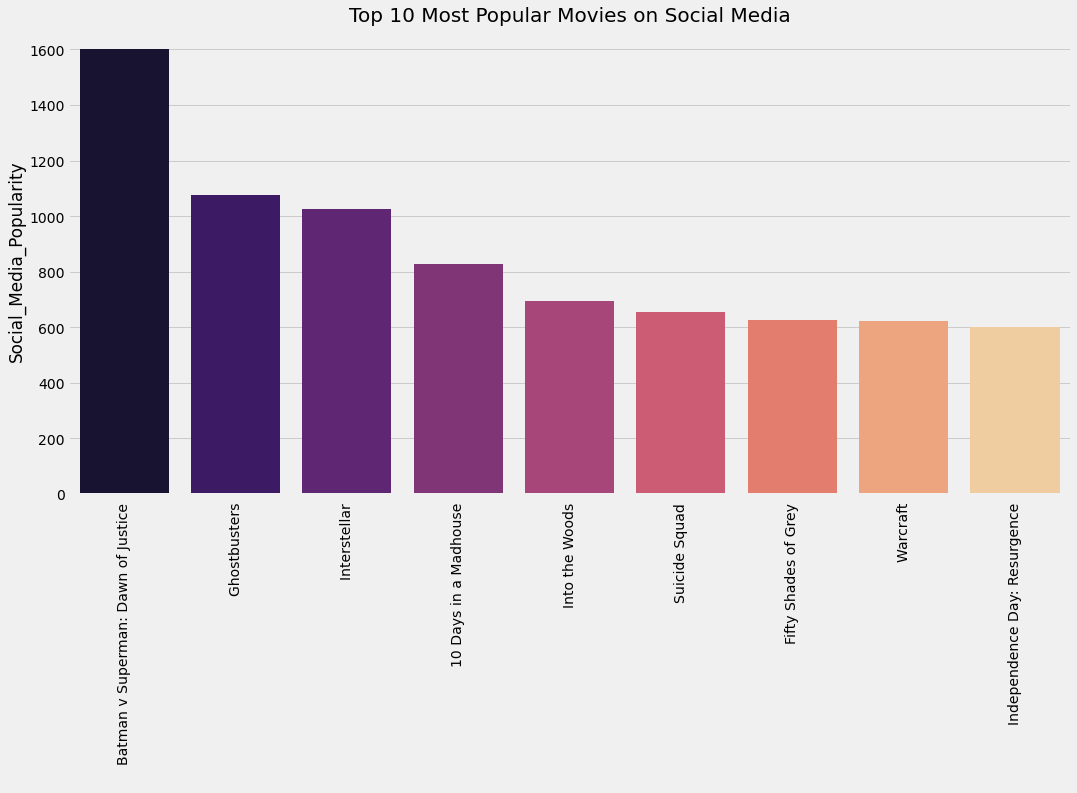

In [36]:
data['Social_Media_Popularity'] = (data['num_user_for_reviews']/
data['num_voted_users'])*data['movie_facebook_likes']
# Also to check the Top 10 Most Popular Movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
ascending = False).head(10).reset_index()
print(x)
sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

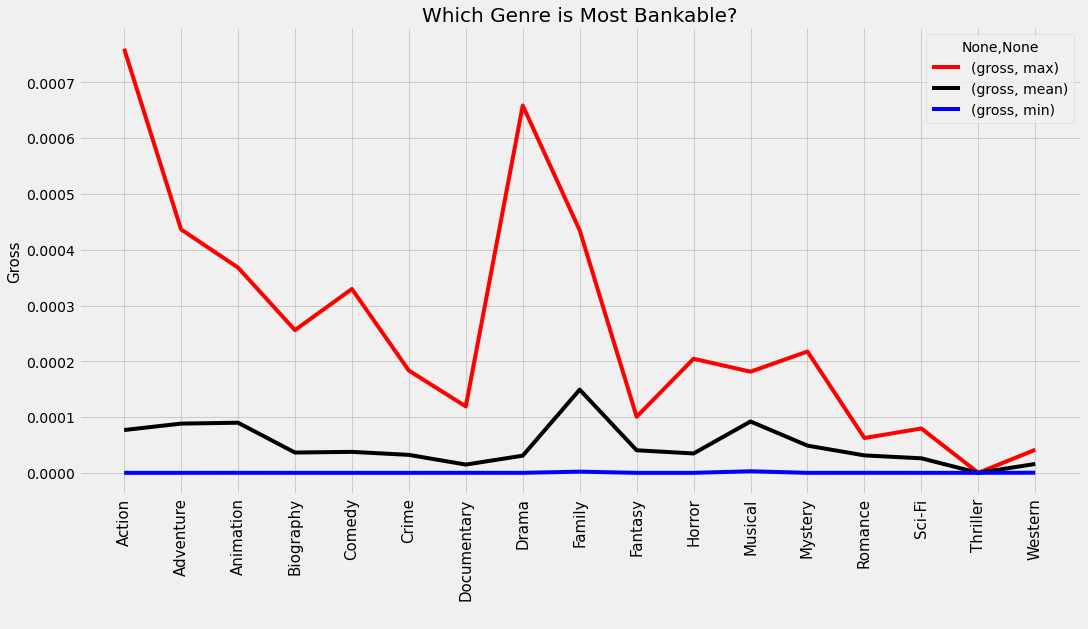

The Most Profitable Movie from each Genre


,Genre1,movie_title,gross
0,Action,Avatar,0.000761
509,Adventure,The Lion King,0.000423
521,Animation,Despicable Me 2,0.000368
1403,Biography,The Blind Side,0.000256
836,Comedy,Forrest Gump,0.000330
3466,Crime,The Godfather,0.000135
3583,Documentary,Fahrenheit 9/11,0.000119
26,Drama,Titanic,0.000659
3080,Family,E.T. the Extra-Terrestrial,0.000435
2485,Fantasy,The Others,0.000096


In [37]:
#Now to compare the Gross with Genres.
#First group the genres and get the max, min, and avg gross of the movies of that genre.
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', color = ['red','black','blue'])
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()
print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
'movie_title','gross']].style.background_gradient(cmap = 'copper'))

Most Profitable Years in Box Office


D:\Anaconda(Python Class)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


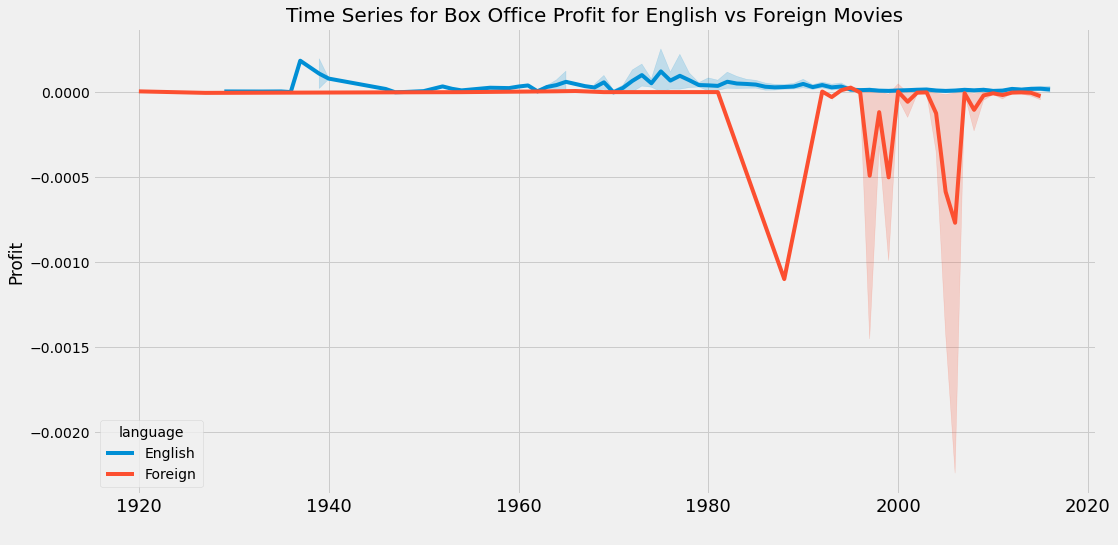

In [46]:
#To find Most Profitable Years in Box Office:
data['title_year'] = data['title_year'].astype('int')
print('Most Profitable Years in Box Office')
display(data[['title_year','language','Profit']].groupby(['language',
'title_year']).agg('sum').sort_values(by = 'Profit',
ascending = False).head(10).style.background_gradient(cmap = 'Greens'))
# Plot them
sns.lineplot(data['title_year'], data['Profit'], hue = data['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies'
          , fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()

,movie_title,duration,gross,Profit
0,Avatar,Long,0.000761,0.000524
29,Jurassic World,Long,0.000652,0.000502
26,Titanic,Long,0.000659,0.000459
3024,Star Wars: Episode IV - A New Hope,Long,0.000461,0.000450
17,The Avengers,Long,0.000623,0.000403


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Short,0.000435,0.000424
509,The Lion King,Short,0.000423,0.000378
812,Deadpool,Short,0.000363,0.000305
521,Despicable Me 2,Short,0.000368,0.000292
338,Finding Nemo,Short,0.000381,0.000287


D:\Anaconda(Python Class)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gross Comparison')

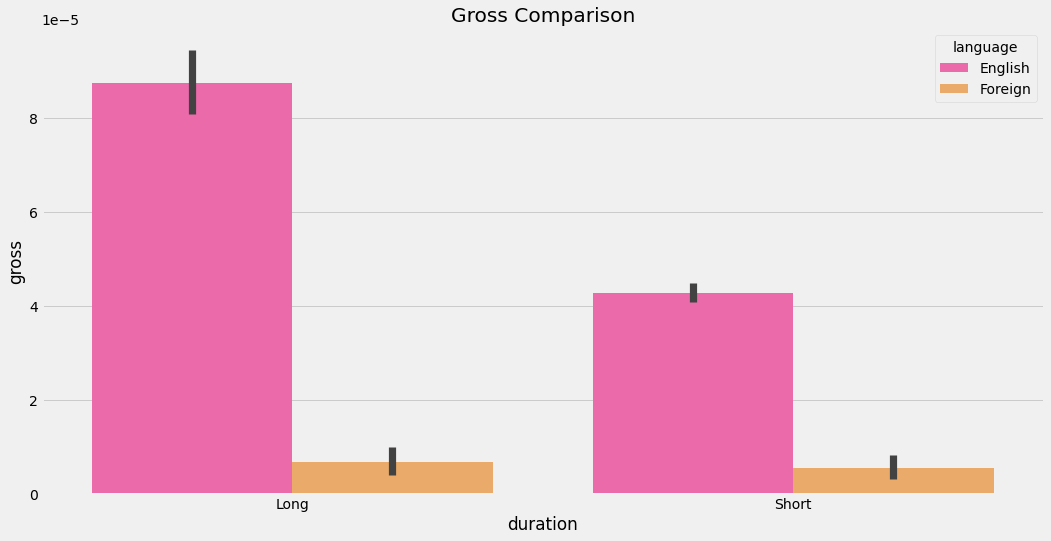

In [47]:
#To find Movies that Made Huge Losses
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross',
'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))
display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross',
'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))
sns.barplot(data['duration'], data['gross'], hue = data['language'], palette = 'spring')
plt.title('Gross Comparison')

In [48]:
#Now to print average IMDB Score for Long Duration Movies
print("Average IMDB Score for Long Duration Movies is {0:.2f}"
     .format(data[data['duration'] == 'Long']['imdb_score'].mean()))

Average IMDB Score for Long Duration Movies is 7.06


In [49]:
#Then print average IMDB Score for Short Duration Movies
print("Average IMDB Score for Short Duration Movies is {0:.2f}"
      .format(data[data['duration'] == 'Short']['imdb_score'].mean()))

Average IMDB Score for Short Duration Movies is 6.28


In [50]:
#Highest Rated Long Duration Movie
print("\nHighest Rated Long Duration Movie\n",
data[data['duration'] == 'Long'][['movie_title','imdb_score']]
      .sort_values(by = 'imdb_score', ascending = False).head(1))


Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3


In [51]:
#Highest Rated Short Duration Movie
print("\nHighest Rated Short Duration Movie\n",
data[data['duration'] == 'Short'][['movie_title','imdb_score']]
      .sort_values(by = 'imdb_score', ascending = False).head(1))


Highest Rated Short Duration Movie
         movie_title  imdb_score
4427  Modern Times          8.6


D:\Anaconda(Python Class)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


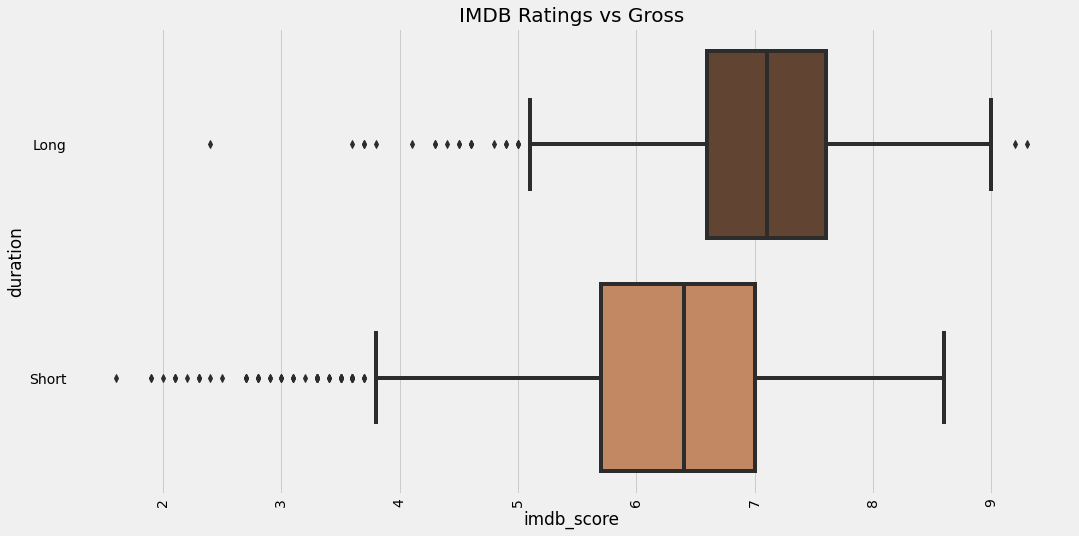

In [62]:
#BoxPlot
#IMDB Ratings vs Gross
sns.boxplot(data['imdb_score'], data['duration'], palette = 'copper')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()